In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [1]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)

# A comprehensive guide to downloading stock prices in Python

For the accompanying article, please take a look [here]().

## Setup

In [2]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

## Downloading the stock prices using `yfinance`

Download Tesla's stock prices between from 2019:

In [3]:
tsla_df = yf.download('TSLA', start='2019-01-01', 
                      end='2019-12-31', progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500


Use the `Ticker` module to download Tesla's stock prices (all-time):

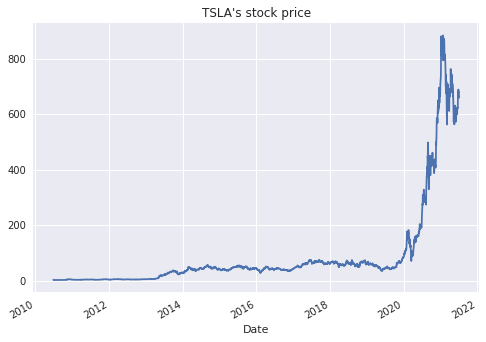

In [4]:
ticker = yf.Ticker('TSLA')

tsla_df = ticker.history(period="max")

tsla_df['Close'].plot(title="TSLA's stock price");

## Downloading the stock prices using `yahoofinancials`

In [5]:
yahoo_financials = YahooFinancials('TSLA')

data = yahoo_financials.get_historical_price_data(start_date='2000-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='weekly')

tsla_df = pd.DataFrame(data['TSLA']['prices'])
tsla_df = tsla_df.drop('date', axis=1).set_index('formatted_date')
tsla_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2010-06-28,6.084,3.508,3.800,3.840,246560000,3.840
2010-07-05,4.000,2.996,4.000,3.480,127753000,3.480
2010-07-12,4.300,3.380,3.590,4.128,77194500,4.128
2010-07-19,4.450,3.900,4.274,4.258,35878500,4.258
2010-07-26,4.300,3.910,4.300,3.988,15260000,3.988


In [6]:
yahoo_financials.get_stock_quote_type_data()

{'TSLA': {'exchange': 'NMS',
  'shortName': 'Tesla, Inc.',
  'longName': 'Tesla, Inc.',
  'exchangeTimezoneName': 'America/New_York',
  'exchangeTimezoneShortName': 'EDT',
  'isEsgPopulated': False,
  'gmtOffSetMilliseconds': '-14400000',
  'quoteType': 'EQUITY',
  'symbol': 'TSLA',
  'messageBoardId': 'finmb_27444752',
  'market': 'us_market'}}

In [7]:
yahoo_financials.get_key_statistics_data()

{'TSLA': {'annualHoldingsTurnover': None,
  'enterpriseToRevenue': 18.109,
  'beta3Year': None,
  'profitMargins': 0.0318,
  'enterpriseToEbitda': 143.007,
  '52WeekChange': 1.4852109,
  'morningStarRiskRating': None,
  'forwardEps': 6.2,
  'revenueQuarterlyGrowth': None,
  'sharesOutstanding': 963329984,
  'fundInceptionDate': '-',
  'annualReportExpenseRatio': None,
  'totalAssets': None,
  'bookValue': 23.901,
  'sharesShort': 39363717,
  'sharesPercentSharesOut': 0.040900003,
  'fundFamily': None,
  'lastFiscalYearEnd': 1609372800,
  'heldPercentInstitutions': 0.42685002,
  'netIncomeToCommon': 1112000000,
  'trailingEps': 0.998,
  'lastDividendValue': None,
  'SandP52WeekChange': 0.37300396,
  'priceToBook': 27.596336,
  'heldPercentInsiders': 0.19487,
  'nextFiscalYearEnd': 1672444800,
  'yield': None,
  'mostRecentQuarter': 1617148800,
  'shortRatio': 1.52,
  'sharesShortPreviousMonthDate': '2021-05-14',
  'floatShares': 775057145,
  'beta': 1.995108,
  'enterpriseValue': 650823

In [8]:
yahoo_financials.get_summary_data()

{'TSLA': {'previousClose': 678.9,
  'regularMarketOpen': 681.7115,
  'twoHundredDayAverage': 698.9441,
  'trailingAnnualDividendYield': None,
  'payoutRatio': 0,
  'volume24Hr': None,
  'regularMarketDayHigh': 684,
  'navPrice': None,
  'averageDailyVolume10Day': 20724680,
  'totalAssets': None,
  'regularMarketPreviousClose': 678.9,
  'fiftyDayAverage': 622.55664,
  'trailingAnnualDividendRate': None,
  'open': 681.7115,
  'toCurrency': None,
  'averageVolume10days': 20724680,
  'expireDate': '-',
  'yield': None,
  'algorithm': None,
  'dividendRate': None,
  'exDividendDate': '-',
  'beta': 1.995108,
  'circulatingSupply': None,
  'startDate': '-',
  'regularMarketDayLow': 651.4002,
  'priceHint': 2,
  'currency': 'USD',
  'trailingPE': 660.9018,
  'regularMarketVolume': 23284450,
  'lastMarket': None,
  'maxSupply': None,
  'openInterest': None,
  'marketCap': 635393212416,
  'volumeAllCurrencies': None,
  'strikePrice': None,
  'averageVolume': 28450216,
  'priceToSalesTrailing12M

In [9]:
yahoo_financials.get_stock_earnings_data()

{'TSLA': {'earningsData': {'quarterly': [{'date': '2Q2020',
     'actual': 0.44,
     'estimate': -0.04},
    {'date': '3Q2020', 'actual': 0.76, 'estimate': 0.58},
    {'date': '4Q2020', 'actual': 0.8, 'estimate': 1.03},
    {'date': '1Q2021', 'actual': 0.93, 'estimate': 0.79}],
   'currentQuarterEstimate': 0.96,
   'currentQuarterEstimateDate': '2Q',
   'currentQuarterEstimateYear': 2021,
   'earningsDate': [{'raw': 1626739200, 'fmt': '2021-07-20'},
    {'raw': 1627257600, 'fmt': '2021-07-26'}]},
  'financialsData': {'yearly': [{'date': 2017,
     'revenue': 11759000000,
     'earnings': -1962000000},
    {'date': 2018, 'revenue': 21461000000, 'earnings': -976000000},
    {'date': 2019, 'revenue': 24578000000, 'earnings': -862000000},
    {'date': 2020, 'revenue': 31536000000, 'earnings': 721000000}],
   'quarterly': [{'date': '2Q2020',
     'revenue': 6036000000,
     'earnings': 104000000},
    {'date': '3Q2020', 'revenue': 8771000000, 'earnings': 331000000},
    {'date': '4Q2020', 

<AxesSubplot:>

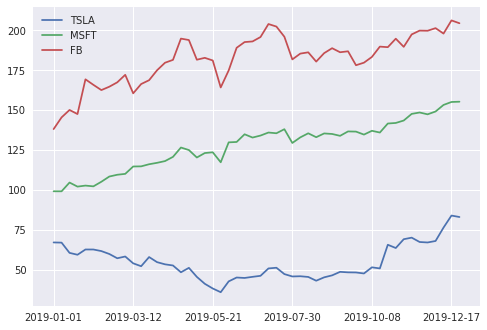

In [10]:
assets = ['TSLA', 'MSFT', 'FB']

yahoo_financials = YahooFinancials(assets)

data = yahoo_financials.get_historical_price_data(start_date='2019-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='weekly')

prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})

prices_df.plot()